In [43]:
import pandas
import matplotlib.pyplot as pyplot
import numpy
import seaborn

# Read in the data and display the first 5 columns
dataframe = pandas.read_csv('./calendar.csv')

# Set the date column to be a pandas datetime column
dataframe['date'] = pandas.to_datetime(dataframe['date'])

# Set the price column to be a float
dataframe['price'] = dataframe['price'].str.replace('[\$,]', '', regex=True).astype(float)

dataframe.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,85.0
1,241032,2016-01-05,t,85.0
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


To check the price delta between various times of year and between available and unavailable listings...clear up any NaN values for price

In [44]:
# Check if there are any null values in the available or date columns
nullPrices = dataframe['price'].isnull().sum()

notNullPrices = dataframe['price'].value_counts().sum()

nullPrices, notNullPrices

(459028, 934542)

There are 459,028 rows without a price, and 934,542 rows with a price. Check to see if all the rows without a price are rows that are not available

In [45]:
nullPrices = dataframe.loc[dataframe['available'] == 'f']['price'].isnull().sum()

nullPrices

459028

The rows with unavailable listings do not list a price. What are some options for imputing the missing values? Get a list of available listings and prices

In [46]:
availableListings = dataframe.loc[dataframe['available'] == 't'].copy()

availableListings = availableListings[['listing_id', 'price']].groupby(['listing_id', 'price'], as_index=False)

availableListings = availableListings.mean().groupby('listing_id')['price'].mean().round(2)

availableListings = pandas.DataFrame(availableListings.reset_index())

availableListings

,listing_id,price
0,3335,120.00
1,4291,82.00
2,5682,52.50
3,6606,95.00
4,7369,85.00
...,...,...
3718,10331249,45.00
3719,10332096,40.00
3720,10334184,120.00
3721,10339145,262.33


An option would be to take these means values for available listings and fill all nan fields with their respective mean price based on the listing

In [49]:
def find_available_listings_mean(row):
    """
        INPUT
        row - pandas.core.series.Series

        OUTPUT
        X - A matrix holding all of the variables you want to consider when predicting the response
        y - the corresponding response vector

        This function searches for the listing id of available listings and returns the price
        1. If the price column in the row is null
        2. Search for the listing id in the available listings frame
        3. Get the price
    """
    if numpy.isnan(row['price']):
        try:
            price = availableListings.loc[availableListings['listing_id'] == row['listing_id']]['price'].item()

            return price
        except:
            return row['price']
    else:
        return row['price']

dataframe['price'] = dataframe.apply(
    lambda row: find_available_listings_mean(row),
    axis=1
)

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.S

KeyboardInterrupt: 

In [ ]:
'''
    INPUT
    df - pandas dataframe

    OUTPUT
    X - A matrix holding all of the variables you want to consider when predicting the response
    y - the corresponding response vector

    This function cleans df using the following steps to produce X and y:
    1. Drop all the rows with no salaries
    2. Create X as all the columns that are not the Salary column
    3. Create y as the Salary column
    4. Drop the Salary, Respondent, and the ExpectedSalary columns from X
    5. For each numeric variable in X, fill the column with the mean value of the column.
    6. Create dummy columns for all the categorical variables in X, drop the original columns
    '''

Putting it all together, graph a point plot with one set being the pricing per month for available listings, and the other unavailable listings

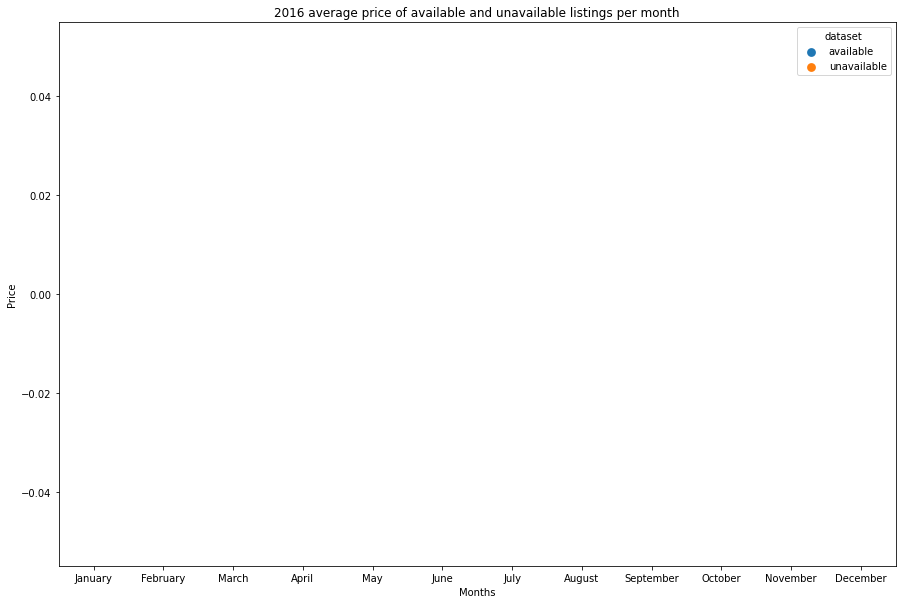

In [48]:
# Plot a bar graph detailing average price per month
def slice_by_availability(_dataframe, availability):
    '''
    INPUT
    df - pandas dataframe
    availability - string

    OUTPUT
    listings - Pandas series
    y - the corresponding response vector

    This function cleans df using the following steps to produce X and y:
    1. Drop all the rows with no salaries
    2. Create X as all the columns that are not the Salary column
    3. Create y as the Salary column
    4. Drop the Salary, Respondent, and the ExpectedSalary columns from X
    5. For each numeric variable in X, fill the column with the mean value of the column.
    6. Create dummy columns for all the categorical variables in X, drop the original columns
    '''
    listings = _dataframe.loc[_dataframe['available'] == availability].copy()
    
    listings['month'] = pandas.to_datetime(listings['date']).dt.month
    listings['year'] = pandas.to_datetime(listings['date']).dt.year

    listings = listings.loc[listings['year'] == 2016].copy()
    
    return listings

available_listings = slice_by_availability(dataframe, 't')
unavailable_listings = slice_by_availability(dataframe, 'f')

plot_data = pandas.concat([available_listings.assign(dataset='available'), unavailable_listings.assign(dataset='unavailable')])

plot_data = plot_data[['month', 'dataset', 'price']]

plot_data['month'] = plot_data['month'].map({1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'})

pyplot.subplots(figsize = (15,10))
seaborn.pointplot(x = 'month', y = 'price', hue='dataset', data=plot_data)
pyplot.ylabel('Price')
pyplot.xlabel('Months')
pyplot.title('2016 average price of available and unavailable listings per month')

pyplot.savefig('available_listings_vs_unavailable_listings_price_2016.png')

By imputing the average price for an available listing onto the NaN values for unavailable listings it's clear there's at least some correlation between price and availability. However, the imputation is limited by a number of factors. For example, a price might be higher due to higher demand which would be missing from the mean.